In [3]:
import os 
os.chdir('/lustre/scratch/kiviaho/prostate_spatial/')

import numpy as np
import pandas as pd
#import scanpy as sc
import anndata as ad
from tqdm import tqdm

#from scripts.utils import load_from_pickle, save_to_pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test

import gseapy as gp

import seaborn as sns
sns.set_theme(style='white')

import warnings
warnings.filterwarnings("ignore")



Matplotlib created a temporary config/cache directory at /tmp/matplotlib-pxb195ra because the default path (/run/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
plot_save_path = '/lustre/scratch/kiviaho/hillock_club_senescence/plots/'

### Dowloading and formatting the gene lists

In [5]:
gene_modules_dict = {
    'scNMF senecent epithelium':['SLPI','WFDC2','CRABP2','ASS1','S100A6','KRT7','RARRES1','GSTP1','KRT19','RHOV','CXCL17','ELF3','CLDN4','ANXA2','OLFM4','S100P','TM4SF1','NCOA7','TACSTD2','GABRP','GPRC5A','MUC4','IGFBP3','LCN2','S100A16','PHLDA2','ATP1B1','MUC1','KRT13','GADD45A','SFN','HSPB1','CYP4B1','KLF5','TMSB4X','RHCG','LYPD3','S100A14','GLUL','RAB11FIP1','EMP1','LY6E','PERP','PLAT','ANXA1','GATA3','S100A11','PSCA','EZR','CEACAM6','GPX2','SDC1','SERPINB1','RND3','CD55','LY6D','CXCL1','DUSP5','CLDN1','SDCBP2','EPHA2','CD82','ERP27','MUC20','SERPINB5','AQP3','UPK1A','LMNA','ZFP36L1','TNFRSF21','SNCG','TSPAN3','TMPRSS4','PLAUR','LGALS3','RAP2B','NCCRP1','PRSS22','KRT23','KRT16','INPP1','TAGLN2','CDKN2B','CTSS','ZNF750','TRIM16','KRT4','ROBO1'],
    'Muscle region' : ['TPM1','SMTN','PPP1R12B','CNN1','FLNC','SYNM','WFDC1','PPP1R14A','ACTG2','LMOD1','KCNMB1','PCP4','MYH11','HSPB8','TAGLN','KCNMA1','ACTA2','TPM2','CARMN','FHL1','CSRP1','JPH2','FLNA','PGM5','DSTN','SYNPO2','MYL9','PDLIM7','LIMS2','DES','MYLK','LDB3','TGFB1I1','CALD1','MCAM','ITGA1','VCL','RBPMS','SORBS1','LPP','TNS1','NEXN','RASL12','SPEG','SGCA','DNAJB5','COL4A2','CHRDL1','SLMAP','AOC3','CDC42EP3','PGM5-AS1','MAP1B','CSPG4','MSRB3','ILK','PLN','ITGA7','MASP1','MAOB','FABP3','RBPMS2','HSPB7','NCS1','CRYAB','ACTN1','PNCK','ACTC1','C12orf75','COX7A1','SVIL','CFL2','PRELP','AHNAK2','ATP2B4','PPP1R12A','ALDH1B1','PDLIM3','CLU','COL4A1','GJC1','ITIH5','ITGA5','ITGA8','ATP1A2','C2orf40','RBFOX3','P2RX1','PDE5A','CAV1','MRVI1','PALLD','MXRA7','MYOCD','SORBS2','ASB2','TMEM200B','CACNA1H','INMT','DPYSL3','PRUNE2','DMD','HSPB6','TMEM35A','TMEM158','TES','SPARCL1','TLN1','FERMT2','HSPG2','FILIP1L','SELENOM','MAP3K20','GNAZ','VWA1','TENT5B','CAVIN1','TINAGL1','MYL6','KCNH2','DACT3','COL6A1','ARHGAP10','FBXL22','MRGPRF','FHOD3','LTBP1','FXYD1','COL6A2','PLIN4','WSCD2','WFS1','SLC2A4','ADAM33','KCNAB1','POPDC2','RCAN2','FILIP1','FAM83D','ITPR1','COL12A1','ACTB','PNMA1','KANK2','AEBP1','CKB','HSPB1','SBSPON','TUBA1A','EHD2','COCH','HAPLN2','AF165147.1','MBNL1-AS1','NCAM1','PYGM','NRP2','MYADM','EDNRA','RHOB','LGALS1','CES1','CCDC107','CTGF','ARHGEF25','JPH4','DTNA','CLIP3','PFKP','TBL1X','NTRK2','FAT3','RSPO3','PRKG1','PDZRN4','ECRG4','PARVA','PTGIS','MFGE8','RRAD','RRAS','CCDC3','SLC8A1','ADGRA2','SCRG1','TMEM47','PDE3A','PPP1R1A','ABCC9','MYOC','ADRA1D','ADCY5','DMPK','CKM','HMCN2','TUBB6','DDR2','TACC1','CORO1C','SNCG','ZNF185','EMILIN1','COL1A2','PCDH10','RARRES2','CTXN1','EYA1','LMO4','C1QTNF1','CAP2','LRCH2','CCDC136','ITGA9','GLIS1','AMOTL2','RAMP1','NFASC','PKIG','LAMA4','MGLL','CLIC4','GAS6','PI16','BAG2','TSPAN2','BCHE','CSDC2','ITGB1','GREM1','OGN','CPED1','SMOC1','SULF1','KIAA1210','SCARA3','DNAJB4','MAP1A','STAC','TIMP2','PKD1','ZEB1','ZYX','WISP2','SH3BGR','SEMA3A','EOGT','PLCL1','KCNB1','WDR1','GPR161','NACC2','BVES','FAM129A','SPOP','RSPO2','TBC1D1','COL1A1','PCOLCE2','NID1','COL16A1','ITM2C','HSPB2','ASB5','PHLDB2','SMOC2','FOXF1','ANXA6','HIF3A','MFAP4','FENDRR','RUSC2','RASL11A','PPP1R12C','HACD1','VSTM2A','NAT8L','PGRMC1','MOB2','RNF150','NR2F1'],
    'Fibroblast region': ['DCN','PODN','FBLN1','MMP2','COL1A2','COL14A1','LUM','SERPINF1','LTBP4','PCOLCE','CCDC80','IGFBP6','MXRA8','COL8A1','SFRP4','SFRP1','C7','MRC2','MMP23B','PDGFRA','ISLR','MATN2','EMILIN1','OGN','SFRP2','CFD','MGP','C1R','ELN','MFAP4','THBS2','IGF1','BGN','C1S','COL1A1','COL3A1','AEBP1','COL6A3','OLFML3','SPARC','FBN1','PLAC9','THBS1','TMEM119','SERPING1','COMP','TIMP2','GGT5','IGFBP5','THY1','HTRA3','TMEM130','TCF21','MFAP2','CTSK','PRRX1','MOXD1','NR2F1','RARRES2','CDH11','VCAN','A2M','GSN','FXYD6','IGFBP4','OAF','LRP1','FXYD1','EFEMP1','PDGFRB','FBLN5','HSPB6','LGALS1','PAGE4','TPSB2','CXCL12','HIC1','TNXB','DKK3','COL5A1','APOD','COL6A2','ESR1','SPOCK3','EFEMP2','PRELP','COL16A1','PTGDS','S100A4','FN1','EPHA3','GPM6B','EMP3','FIBIN','MEG3','ALDH1A1','SSPN','PMP22','PI16','PLPP3','ITGA11','CD248','MFGE8','TFPI','RCN3','ADGRA2','HTRA1','ZCCHC24','CTHRC1','FBLN2','PLTP','GEM','AXL','SMOC1','LTBP3','C11orf96','PTGIS','TGFBI','COL5A2','PAMR1','BOC','FGF7','F10','TIMP3','CES1','DDR2','GAS6','CYR61','PCDH18','P3H3','DIO2','PCDH10','FSTL3','RBP1','SPON1','CNTN1','SSC5D','CYGB','IGFBP7','SLIT2','FKBP10','SEPT11','SCN7A','MKX','KIAA1755','CNTN4','VIM','RNASE1','SULF1','RND3','DES','MYLK','STRA6','INHBA','TPSAB1','COL15A1','HEPH','ANXA6','TAGLN','CERCAM','FLRT2','DPYSL2','COL6A1','DIO3OS','NFATC4','GREM1','ACTA2','PID1','SETBP1','ECM2','FAIM2','MRGPRF','ACTG2','FGFR1','CSRP1','INMT','C1QB','C1QL1','CAVIN1','ITGBL1','EPHA7','GFRA1','FOXF1','SAMD11','ZBTB20','SPARCL1','BST2','IGKC','RBMS1','ECM1','MYH11','EDIL3','FILIP1L','CCN1','CYBRD1','PCOLCE2','QSOX1','CAVIN3','SYNPO2','LAMA4','SOD3','MYL9','C1QA','TIMP1','C3','CPXM2','CHRDL1','GPNMB','MDK','MAN1A1','BMP4','SYDE1','FOLR2','DCHS1','ADRA2C','ADAMTSL2','NREP','LAMB2','HHIP','SERPINE1','SYNPO','CCND2','MEIS1','ADAM33','TUBA1A','FLNA','BMP5','RAB31','CCN2','MMP14','FZD7','PDE5A','COL4A2','GYPC','TGFB1','TSPAN4','CAMK2N1','LOXL1','SERPINH1','AKAP12','CLDN11','NBL1','JAM3','FRZB','CPA3','ADAMTS2','FSTL1','LAMA2','MXRA7','IGHG1','MXRA5','CLMP','ASPN','FAP','PDLIM2','ABCA8','NKD2','NID2','SORBS1','IGHG3','LTBP1','TPM2','EDNRA','SRD5A2','SYNE1','CD14','PTN','PRNP','PRRX2','PHLDA3','S100A13','NEXN','CTGF','CNN1','FOSB','LMOD1','RRAS','POSTN','TYROBP','PPIC','RFTN1','LHFPL6','ANTXR1','IGLC2','IGHG4','ID3','NR2F2','TCF4','ANGPTL2','PHLDB1','SLC8A1','LTBP2','TGFB1I1','EHD2'],
    'Basal region': ['SLC14A1','LAMB3','TRIM29','KRT5','KRT15','TP63','CYP4B1','DEFB1','COL17A1','DLK2','SDC1','THSD4','TNS4','SCUBE2','MPZL2','DSC3','NTN4','ITGB4','GATA3','KRT19','FGFR2','GABRE','DMKN','NTF4','PROM2','COL7A1','FAT2','CSTA','DUOX1','MEGF6','KRT7','FLRT3','TFCP2L1','KRT14','PITX1','IRX3','ITGA2','EGFR','KRT17','KRT23','FOXQ1','CAPNS2','CEL','KRT13','TEPP','MIR205HG'],
    'Luminal region':['ACPP','CPLX3','HIST2H2BE','RDH11','SCD','ARG2','LMAN1L','MSMB','NEFH','HGD','HIST1H2AC','TMPRSS2','TTC39A','CD38','DHRS7','ACSL1','RCAN3','CLGN','SLC45A3','LINC01297','SLC31A1','TMEM79','CYB561','STEAP2','DPP4','CPE','NIPAL3','AP000527.1','SLC30A4','GP2','GCNT2','GNG4','GREB1','ELOVL7','SORD','FAM135A','MLPH','CD177','PEBP4','IDH1','SYT7','KLK4','RBM47','EPHX2','MSMO1','RTN1','VEGFA','HIST1H2BD','KLK3','ANO7','CHRM1','ABHD17C','KIF1A','CPNE4','RAB27A','CWH43','ENTPD5','CREB3L4','TSPAN8','BCAS1','SEC11C','FAAH','BASP1','BMPR1B','AMD1','GPT2','LRRC26','PART1','ELK4','EFCAB12','PDE11A','ENDOD1','STEAP1','NKX3-1','PLA2G4F','TMEM254','SPOCK1','LINC00844','P2RY1','NPY','PDIA3','TMEM220','PLEKHH1','PLPP6','NXPH4','CDH26','PRIM2','SQLE','OR51E2','CCK','RAB27B','KBTBD11','ALOX15B','ENPP5','DBI','SLC39A6','ACAT2','GFPT1','GALNT12','ELOVL5'],
    'Tumor region': ['PRAC1','SNHG8','SNHG19','HPN','HIST3H2A','LINC00665','PYCR1','SLC38A11','IMPDH2','TGM3','TRGC1','PHGR1','CSKMT','MARCKSL1','VPS9D1-AS1','PPP1R14B','LRRC75A','GOLM1','AMACR','ZFAS1','AL451127.1','B4GALNT4','SPDEF','SLC19A1','AL445524.1','FABP5','GJB1','GGCT','SNHG7','RNF157','SLIT1','REPS2','GLYATL1','FAM234B','PAICS','EIF4EBP1','FOXP4-AS1','TESMIN','PPAT','CRISP3','RRS1','RCC1','TSPAN1','C19orf48','CPNE7','PTRHD1','PDLIM5','CGREF1','LUZP2','ECHS1','UCK2','CFAP65','NUDT8','PCAT14','SLC43A1','NEK5','FOLH1','KLK2','TTC36','VSTM2L','ATP6V0E2','NME1','MAZ','NLE1','MIPEP','MICAL2','TBX1','MARC1','ELFN1-AS1','GDF15','NBEAL1','MDH2','TDRD1','SIM2','CD3EAP','PODXL2','SAMD5','DNAH5','CCDC86','ODC1','TRPM4','PCA3','AHCY','DLX1','TMSB15A','APBA2','UQCRH','TMEM52','C2orf72','SMKR1','NOP16','CD320','NPM1','AC009119.1','SLC25A39','TXNL4A','IQANK1','BYSL','DNPH1','TFF3'],
    'TNF_via_NFKB': ['ABCA1','ACKR3','AREG','ATF3','ATP2B1','B4GALT1','B4GALT5','BCL2A1','BCL3','BCL6','BHLHE40','BIRC2','BIRC3','BMP2','BTG1','BTG2','BTG3','CCL2','CCL20','CCL4','CCL5','CCN1','CCND1','CCNL1','CCRL2','CD44','CD69','CD80','CD83','CDKN1A','CEBPB','CEBPD','CFLAR','CLCF1','CSF1','CSF2','CXCL1','CXCL10','CXCL11','CXCL2','CXCL3','CXCL6','DENND5A','DNAJB4','DRAM1','DUSP1','DUSP2','DUSP4','DUSP5','EDN1','EFNA1','EGR1','EGR2','EGR3','EHD1','EIF1','ETS2','F2RL1','F3','FJX1','FOS','FOSB','FOSL1','FOSL2','FUT4','G0S2','GADD45A','GADD45B','GCH1','GEM','GFPT2','GPR183','HBEGF','HES1','ICAM1','ICOSLG','ID2','IER2','IER3','IER5','IFIH1','IFIT2','IFNGR2','IL12B','IL15RA','IL18','IL1A','IL1B','IL23A','IL6','IL6ST','IL7R','INHBA','IRF1','IRS2','JAG1','JUN','JUNB','KDM6B','KLF10','KLF2','KLF4','KLF6','KLF9','KYNU','LAMB3','LDLR','LIF','LITAF','MAFF','MAP2K3','MAP3K8','MARCKS','MCL1','MSC','MXD1','MYC','NAMPT','NFAT5','NFE2L2','NFIL3','NFKB1','NFKB2','NFKBIA','NFKBIE','NINJ1','NR4A1','NR4A2','NR4A3','OLR1','PANX1','PDE4B','PDLIM5','PER1','PFKFB3','PHLDA1','PHLDA2','PLAU','PLAUR','PLEK','PLK2','PLPP3','PMEPA1','PNRC1','PPP1R15A','PTGER4','PTGS2','PTPRE','PTX3','RCAN1','REL','RELA','RELB','RHOB','RIGI','RIPK2','RNF19B','SAT1','SDC4','SERPINB2','SERPINB8','SERPINE1','SGK1','SIK1','SLC16A6','SLC2A3','SLC2A6','SMAD3','SNN','SOCS3','SOD2','SPHK1','SPSB1','SQSTM1','STAT5A','TANK','TAP1','TGIF1','TIPARP','TLR2','TNC','TNF','TNFAIP2','TNFAIP3','TNFAIP6','TNFAIP8','TNFRSF9','TNFSF9','TNIP1','TNIP2','TRAF1','TRIB1','TRIP10','TSC22D1','TUBB2A','VEGFA','YRDC','ZBTB10','ZC3H12A','ZFP36'],
    'G2M_checkpoint': ['ABL1','AMD1','ARID4A','ATF5','ATRX','AURKA','AURKB','BARD1','BCL3','BIRC5','BRCA2','BUB1','BUB3','CASP8AP2','CBX1','CCNA2','CCNB2','CCND1','CCNF','CCNT1','CDC20','CDC25A','CDC25B','CDC27','CDC45','CDC6','CDC7','CDK1','CDK4','CDKN1B','CDKN2C','CDKN3','CENPA','CENPE','CENPF','CHAF1A','CHEK1','CHMP1A','CKS1B','CKS2','CTCF','CUL1','CUL3','CUL4A','CUL5','DBF4','DDX39A','DKC1','DMD','DR1','DTYMK','E2F1','E2F2','E2F3','E2F4','EFNA5','EGF','ESPL1','EWSR1','EXO1','EZH2','FANCC','FBXO5','FOXN3','G3BP1','GINS2','GSPT1','H2AX','H2AZ1','H2AZ2','H2BC12','HIF1A','HIRA','HMGA1','HMGB3','HMGN2','HMMR','HNRNPD','HNRNPU','HOXC10','HSPA8','HUS1','ILF3','INCENP','JPT1','KATNA1','KIF11','KIF15','KIF20B','KIF22','KIF23','KIF2C','KIF4A','KIF5B','KMT5A','KNL1','KPNA2','KPNB1','LBR','LIG3','LMNB1','MAD2L1','MAP3K20','MAPK14','MARCKS','MCM2','MCM3','MCM5','MCM6','MEIS1','MEIS2','MKI67','MNAT1','MT2A','MTF2','MYBL2','MYC','NASP','NCL','NDC80','NEK2','NOLC1','NOTCH2','NSD2','NUMA1','NUP50','NUP98','NUSAP1','ODC1','ODF2','ORC5','ORC6','PAFAH1B1','PBK','PDS5B','PLK1','PLK4','PML','POLA2','POLE','POLQ','PRC1','PRIM2','PRMT5','PRPF4B','PTTG1','PTTG3P','PURA','RACGAP1','RAD21','RAD23B','RAD54L','RASAL2','RBL1','RBM14','RPA2','RPS6KA5','SAP30','SFPQ','SLC12A2','SLC38A1','SLC7A1','SLC7A5','SMAD3','SMARCC1','SMC1A','SMC2','SMC4','SNRPD1','SQLE','SRSF1','SRSF10','SRSF2','SS18','STAG1','STIL','STMN1','SUV39H1','SYNCRIP','TACC3','TENT4A','TFDP1','TGFB1','TLE3','TMPO','TNPO2','TOP1','TOP2A','TPX2','TRA2B','TRAIP','TROAP','TTK','UBE2C','UBE2S','UCK2','UPF1','WRN','XPO1','YTHDC1'],
    'PDAC T1RS': ['LIPH','SCNN1A','CXCL5','LRG1','MMP7','CEACAM6','PTGS2','C15orf48','TMC5','PRSS22','CFB','LYN','CEACAM5','CXCL6','ZC3H12A','CCL20','EPS8L3','SMOX','SORD','DUOX2','CSF2','CHI3L1','DUOXA2','CXCL3','PIGR','VNN1','ICAM1','C3','TNFAIP2','H6PD','CXCL1','CEACAM7','GK','C9orf16','CEACAM1','CXCL2','NOS2','SFTPD','CSF3','EXOC3L4','LBP','PLA1A','CCL2','LTF','CEBPD','MUC13','NFKBIA','TNIP3','CD14','SLC11A2','PGLYRP1','GK3P','CEACAM8','CEACAM3','PLET1','MICALL2','ERO1A','IL36A','VNN3','CFHR4'],
    'PDAC IL1B': ['CCL3L1','IGHG3','CCR7','IGKC','MIR155HG','IL1B','IL1A','IGHG1','CCL4L2','IL6','TNF','CCL4','CCL20','TCHH','IGHA1','CCL3','PDGFB','AP003354.2','NLRP3','FCGBP','THAP2','AC245014.3','AC007952.4','CXCL1','BIRC3','NFKB1','AL136987.1','AC016831.1','LINC00513','CXCL3','TRAF1','ICAM4','TCOF1','PTGS2','TNFAIP2','PLEKHG2','CXCL2','ICAM1','TNFAIP3','CXCL8','SRGAP1','IL10','NFKBIA','DNAAF1','GPR84','IER3','PDE4B','RRAD','C3','KDM6B','AC103591.3','CFLAR','TNFAIP6','SERPINB9','GPR132','CYB5D1','IL1R2','SLC7A5','NFKBIZ','EREG','CCL5','AL360012.1','AC058791.1','PLAUR','GPR183','IRAK2','EIF4E','ZNF267'],
    'PDAC Neutrophils': ['S100A8','CXCL8','FCGR3B','IL1R2','S100A12','PROK2','NAMPT','CSF3R','CMTM2','S100A9','BCL2A1','AC245128.3','ADGRG3','IFITM2','AL034397.3','SAMSN1','IVNS1ABP','AQP9','PTGS2','GCA','BASP1','G0S2','FPR1','PLEK','PHACTR1','FPR2','LITAF','ANP32A','ACSL1','MNDA','RIPOR2','NCF1','ALOX5AP','CPD','SMIM25','TREM1','IRAK3','SRGN','RNF149','NABP1','LST1','NSMAF','LCP1','MME','SLA','SELL','CXCR2','LCP2','HCAR2','C5AR1'],
    #'Prostate IL1B':['IL1B','NFKBIA','BCL2A1','CCL3','SOD2','IER3','PNRC1','CXCL2','PLAUR','NFKB1','CCL4','BTG1','CXCL3','CFLAR','SRGN','CCL4L2','CD44','TNFAIP3','MIR155HG','MARCKS','NEAT1','PLEK','KDM6B','FTH1','REL','EIF1','ICAM1','NINJ1','S100A11','SAT1','B2M','CD83','NAMPT','H3F3A','FTL','PTGS2','WTAP','FCER1G','TNFAIP8','NFKBIZ','TNFAIP2','CCL20','C5AR1','IL1A','NLRP3','PDE4B','SDCBP','CTSL','CCRL2','H3F3B','G0S2','CREM','ANXA5','MAP2K3','LITAF','SOCS3','KLF6','PIM3','SERPINB9','THAP2','DDX5','TYROBP','PPP1R15A','HLA-A','MALAT1','DUSP1','CD63','HNRNPC','PHLDA1','ZEB2','CDKN1A','CEBPB','RPS16','TRAF1','OLR1','PRDX1','RPS28','FOSB','CHMP4B','TPT1','MAP3K8','TNF','SERF2','RPLP1','MCL1','MAFF','MYL6','CYBA','PDE4DIP','HSP90AB1','HLA-B','ETS2','UBE2D3','FCGR2A','EMP3','GPR183','DNAJB6','YBX1','VIM','FAU','ID2','EHD1','NPC2','IL1RN','LIMS1','HSP90AA1','PTMA','RPS15','ABL2','TMSB10','EREG','RAC1','ARL8B','NFE2L2','BASP1','MS4A7','LCP2','ATP13A3','JUND','ABCA1','DUSP2','CST3','PSAP','RPL28','RPS29','BIRC3','FNIP2','HLA-DRA','RPS27A','ZNF267','DUSP6','RPL10','EIF4E','RPS27','XBP1','NRP2','CTSZ','KMO','PLK3','RPL37','INSIG1','ANXA2','RPL39','CFL1','RAB7A','FOSL2','SRP14','PPIF','PNP','ATP6V1F','DSE','SPHK1','CSRNP1','RILPL2','STX11','ELL2','LUCAT1','RPL36','VEGFA','RTN4','LGALS3','GPX4','CD74','RBM47','NQO2','KYNU','SLC7A5','AIF1','RPL36AL','DNAJA1','SERP1','PRNP','PFKFB3','UBB','IFNGR2','LGALS1','POLR2L','ATP1B3','PPIA','ITM2B','GAPDH','HNRNPU','HLA-DRB1','RGCC','MXD1','ARL5B','TNFRSF1B','BRI3','SFPQ','CTSB','YBX3','TXN','ZC3H12A','PLIN2','CHMP1B','CTSS','CD68','MT2A','ATP2B1','DDX3Y','CMTM6','UPP1','GNG5','MGAT1','SQSTM1','GRINA','TIMP1','YWHAZ','B3GNT5','HSPA1A','MAP1LC3B','PTPN1','EIF1B','PLAU','HNRNPA2B1','ITGAX','ETV3','STX4','CTSD','UBL5','PPP1R15B','PHACTR1','GPR84','UBE2D1','CHCHD2','VMP1','RASGEF1B','POMP','SKP1','OTUD1','SAMSN1','SEC61B','SPAG9','BAZ1A','ERN1','COX6A1','TRIB1','CALM1','CXCL1','CSTB','MFSD2A','HSPH1','TMEM176B','HIF1A','TOP1','OST4','RPL36A','COX7A2','IL10','AKAP13','S100A10','S100A6','COX8A','EIF4A3','NR4A3','CLIC1','PMAIP1','COX6B1','LYZ','RAB21','METRNL','CHCHD10','NDUFB2','TSPO','SRRM2','MT1X','EIF5','TANK','TUBB4B','TPI1','HSPE1','APLP2','TPP1','DBI','APOE','DRAM1','HSPA5','MRPS6','RAB1A','TNIP1','MMP9','B4GALT1','FAM107B','HSPD1','FCGRT','ATP6V0E1','GBP2','CDV3','IL10RA','ATP6V0B','MFSD1','SDC4','COX7B','SMIM3','PCBP1','BIRC2','TGIF1','GSTO1','GLUL','UBE2S','ZFP36L1','LMNA','IRAK2','BZW1','DDX3X','EFHD2','RNF19B','DENND5A','MAFB','IL6','NDUFA1','UBE2B','COX6C','CREG1','SOD1','SKIL','NOP10','ZFAND5','QKI','DUSP5','GCH1','HSPB1','GADD45B','TLR4','PNPLA8','RAPGEF2','AREG','ARL6IP1','SLC43A3','RNF145','CD40','SRSF5','TAGLN2','SPI1','NFKB2','CD81','ATP6V0D1','BCL3','TAGAP','PMP22','IQGAP1','PABPC4','GPR132','LDHA','MAP4K4','RPS10','CCR7','ARHGEF2','GNAI2','SMS','ARHGDIA','PELI1','MMP19','COTL1','KLHL21','ISG20','ATP6V1H','SEC61G','LPXN','ACSL1','S100A4','COX17','FNDC3B','ITGAV','IVNS1ABP','RHEB','SNX9','PTGER4','BNIP3L','PDXK','NDUFA11','SGK1','HCST','RALGDS','AQP9','SON','NFAT5','BHLHE40','FPR1','PKM','RAP1B','CDC37','MSN','CD14','IRF1','TYMP','GLS','CFD','MAPK6','PTPRE','HNRNPA3','SNN','CTNNB1','NDUFB1','TNFAIP6','MSR1','TUBA1C','RASGRP3','ZNF706','BCAT1','SH3BP5','C1QA','MGLL','MPP1','SERPINA1','GK','GLRX','TWISTNB','RUNX1','DNAJB1','GUK1','C1QB','BLVRB','DNTTIP2','ARF4','USP12','CD99','PHLDA2','NDUFA3','IFITM3','TSC22D2','GNA13','PLSCR1','FLNA','ATP1A1','BAG3','RPS27L','RABGEF1','ANXA1','MAPKAPK2','CDC42EP3','YWHAE','GRB2','SEC62','STK4','NFKBID','CD55','FCGR3A','GABARAP','RBM8A','CTSC','TCHH','CD93','CASP1','MS4A4A','CD58','ETF1','TPM4','NDUFA13','LPCAT1','RAB10','APOC1','MARCKSL1','CPEB4','INHBA','SERPINB1','IRF8','H2AFJ','CAST','NRIP1','HIVEP2','SLC15A3','AP1S2','SLC3A2','COPE','CCL2','DENND4A','MIR22HG','BACH1','ITPRIP','B4GALT5','PTMS','PILRA','HES4','IL6R','MAT2A','BID','LY96','TET2','CD84','SNRPB','ATP6V1C1','GYPC','CITED2','TREM1','PET100','PLEKHB2','TREM2','GRAMD1A','FLOT1','IPO7','SERTAD1','AHSA1','RELB','ITGA5','LILRB4','ELF1','DNAJA4','GPBP1','HMOX1','CYB5D1','TMEM50A','TNIP3','CARD16','RAB20','ATOX1','CSGALNACT2','NDUFB9','CD163','NFATC1','MYO9B','AHR','SLC16A10','TMEM176A','UBAC2','RAB31','SIRPA','SAV1','SERPINB8','ZBTB43','FABP5','MT1E','TAOK3','ARFGAP3','SDSL','RBBP8','LYN','GRASP','NDUFS6','ITGB1','FOXO3','DNAJC8','NAPA','OSM','SLC25A37','CRTAP','MAFG','RNF144B','LAMP1','ST3GAL6','RBM17','LGMN','RRAD','LAMP2','SESTD1','TACC1','THBD','CLIC4','PDGFB','LAIR1','HBP1','ICAM4','SRSF9','TIMP2','VSIG4','PLEKHF2','SYAP1','VPS37B','SIAH2','RHBDF2','BRD4','RNF149','TGFB1','ZFYVE16','EPB41L3','NFKBIB','FCGR1A','HNRNPAB','BTG3','PIK3R5','SDCCAG8','CDC42SE1','FAM50A','PRDM1','RYBP','JOSD1','GNPDA1','MT1G','SEMA6B','SPCS3','DYNC1H1','RBMS1','FOSL1','SLC38A2','ARID5A','RAB32','UBE2R2','CYLD','PPP2CA','NFKBIE','NUMB','ZFHX3','SRGAP1','EIF3J','ISG15','RHOF','PTPN12','NABP1','AZIN1','F13A1','IFI6','SDS','TPRA1','ATF5','IFI27L2','MPDU1','ODF3B','ELOVL5','AGO2','HOMER3','ZFAND6','FNIP1','LTC4S','ZFY','SDF4','RBBP6','MYC','SNX10','GM2A','ACSL3','DOT1L','A2M','NRIP3','NCR3LG1','HS3ST1','TLR2','SORL1','OASL','G3BP1','GPCPD1','S100A9','BANP','NBN','EMD','NOTCH2','PXDC1','IQGAP2','ARF6','IL23A','DMXL2','FAM177A1','PDE4A','ATP1B1','TAF10','UFM1','KIF1B','SERINC5','STIP1','CORO1C','GEM','H1FX','HDGF','CLEC4E','MRC1','SLC25A33','CHST7','GADD45A','RIPK2','STAT4','BCL2L1','MRPL20','STX3','FNDC3A','HCAR2','UBE2A','TMEM251','TMEM165','ADAM9','MANF','IL2RA','CASP4','CYTH1','BCAS2','USP36','HMGA1','ABHD12','PSEN1','LRRC59','GNA15','BCL6','UBE2H','SLC1A5','CSF3R','HIVEP1','GPR137B','RP2','FUNDC2','MAML2','PMEPA1','TP53BP2','PLA2G7','MCTP1','CD82','IGFBP7','ADAM17','AMPD3','ZMIZ1','PLTP','CD300E','SPSB1','PURB','ZNF385A','KRT10','TMED5','HIST3H2A','CD72','RBM23','STARD3NL','YTHDF3','BCL2','PPP4R2','EAF1','SDF2L1','MRPL54','CISD2','TMEM41B','THBS1','SLC11A2','RBKS','STK40','S100A8','SATB1','MT1F','UBALD2','TSC22D1','ANKLE2','PIK3AP1','DNAAF1','JARID2','SAP30','REV3L','CHIC2','SPP1','KPNA4','FOLR2','CPM','ATP2C1','ZFAND3','DOCK4','INTS6','UBE2E1','LRP1','TIPRL','NUDT4','RHOBTB3','MRAS','SLC43A2','ALCAM','CCDC71L','MSMB','NUMA1','ATP6V0C','EDEM1','LACTB','NENF','HOTAIRM1','ZC3H12C','ETHE1','NAF1','STK10','SMIM4','UGCG','SGPL1','VCAN','B3GNT2','USP16','ZSWIM6','KCTD20','NFIL3','SLAMF7','UBAP1','POLR2A','MAP2K1','FGD4','EMILIN2','NDRG1','EHBP1L1','AAK1','SMCO4','ASPSCR1','SNRPN','DUSP4','LHFPL2','USF2','LILRB2','JMY','TES','CCR5','TMEM107','PRKAG2','SEC24A','GABPB1','SLC39A8','FN1','TBC1D7','NCOR2','ETV6','CYSTM1','MRPL14','MANBA','PTBP1','MMP14','HGSNAT','MCOLN2','DAPK1','MYLIP','PPP2CB','DUSP3','NPL','HMGCS1','SOCS1','MAP2K2','SIPA1L1','NBPF14','STAB1','ARHGAP26','CLCF1','PABPN1','GAS6','NPTN','IRAK3','SYNJ2','FMNL2','TRAF3','ARIH1','RHOQ','MPHOSPH6','SCN1B','ZFC3H1','LINC00346','RCAN1','AGFG1','ALG13','HCAR3','TAGLN','AGAP3','MGP','SPPL2A','TNFSF14','TCF4','N4BP1','HES1','RELT','ARHGAP21','PHACTR4','TNFRSF10B','TNFSF15','SIK3','ZBTB10','WBP4','TRIP10','AZI2','SMAD3','DNAJB9','VIM-AS1','TFDP1','EZH2','ZNF207','PLEKHG2','WDR45B','JOSD2','ANKRD28','SLC25A19','LRIF1','CDCA4','SLC6A6','ACSL5','PPARD','GSAP','SERPING1'],
    'Prostate IL1B':['S100A9','S100A8','FCN1','S100A4','S100A6','VCAN','LYZ','TIMP1','EREG','CD52','SLC11A1','CD55','S100A12','THBS1','CSTA','SAMSN1','SOD2','STXBP2','IL1B','G0S2','BCL2A1','SH3BGRL3','CFP','NAMPT','LST1','CTSS','TSPO','NEAT1','TKT','APOBEC3A','SERPINA1','AQP9','S100A10','CXCL2','CD44','FTH1','C5AR1','EMP3','BIRC3','LILRA5','FGR','SLC25A37','CD300E','IFITM2','SLC2A3','CFD','NFKBIA','NLRP3','FPR1','NFKBIZ'],
    'Prostate T1RS':['A4GALT','ABCC3','ABHD4','ABHD5','ABTB2','ACHE','ACSF2','ACSL4','ADAM8','ADAT3','ADD3','ADIRF','ADM','ADORA2B','AFAP1','AGR2','AGR3','AGRN','AHDC1','AJUBA','AK5','AKIRIN2','ALDH2','ALDH3B1','ALOX5','ALPK1','ALS2CL','AMN','AMOT','AMOTL2','ANGPTL4','ANKRD1','ANKRD12','ANKRD13A','ANKRD35','ANKRD36','ANKRD36C','ANO6','ANO9','ANP32E','ANTXR1','ANXA9','AP1S3','APOBEC3G','APOL6','AQP3','ARAP2','ARHGAP23','ARHGAP27','ARHGAP42','ARHGAP44','ARHGAP5-AS1','ARHGDIB','ARHGEF10L','ARHGEF28','ARID5B','ARL14','ARMC5','ARNTL2','ARPC1B','ARRDC2','ARRDC3','ARRDC4','ARSJ','ASCC3','ASPH','ASS1','ATF3','ATF7IP','ATL2','ATP2B4','AUTS2','AVPI1','AXL','B3GALT4','B3GALT5','B3GNT3','B3GNT7','B4GALNT3','BACE2','BAG1','BARX2','BATF','BAZ2B','BBC3','BCAP29','BCAR1','BCAR3','BCL10','BCL2L15','BCL7B','BCL9L','BDH2','BDKRB2','BEND7','BEST1','BHLHE41','BMP2','BMP3','BNIP2','BPGM','BPIFB1','BST2','BTN2A2','BTN3A1','BTN3A2','C1GALT1','C1R','C1RL','C1S','C2','C3','CA8','CADM3','CADPS2','CAMTA1','CAPG','CAPN13','CAPN2','CAPN8','CARHSP1','CASP10','CAV1','CAV2','CCDC102A','CCDC68','CCDC69','CCDC82','CCL28','CCNL1','CCNT2','CCNYL1','CCSER1','CD47','CD59','CDC42EP1','CDC42EP2','CDC42EP4','CDH3','CDK8','CDKN1B','CDKN2AIP','CDKN2B','CEACAM1','CEACAM5','CEACAM6','CEBPD','CFH','CFI','CFL2','CFTR','CGN','CHAC1','CHD1','CHI3L2','CHKB','CHMP2B','CHPT1','CHST15','CHST2','CIITA','CITED4','CLDN1','CLDN10','CLDN23','CLDN4','CLDN7','CLEC2B','CLEC3A','CLIC3','CLIC6','CLIP4','CLK1','CLK4','CLSTN3','CLU','CMTM7','CMTM8','CMYA5','CNFN','CNGA1','CNN2','CNN3','COL16A1','COL1A1','COL27A1','COQ10B','CP','CPEB2','CRABP2','CRB3','CRIM1','CRIP2','CRTC2','CRY1','CRYAB','CSF1','CSF3','CSRNP2','CST6','CTGF','CTSV','CX3CL1','CXADR','CXCL10','CXCL16','CXCL17','CXCL5','CXCL6','CYB5R4','CYBRD1','CYP24A1','CYP27A1','CYP3A5','CYP4B1','CYP4F12','CYP4X1','CYP7B1','CYR61','DAPK2','DAPP1','DBNDD2','DCDC2','DCP1A','DCPS','DCTN6','DDR1','DDX47','DEFB1','DEGS2','DENND2D','DHRS3','DKK1','DNAJB4','DNAJC17','DNTTIP1','DOK4','DPYD','DTX2','DTX4','DUOX2','DUOXA2','DUSP10','DUSP16','DUSP23','DUSP8','ECHDC1','EDN1','EFEMP2','EFHD1','EFNA1','EFNA5','EGLN3','EGOT','EGR1','EGR2','EHD2','ELF3','ELK3','ELL','EMP1','EPAS1','EPB41L1','EPB41L4A','EPC1','EPHA2','EPHX3','EPS8','EPS8L1','EPSTI1','ERF','ERN2','ERP27','ERRFI1','ESPN','ETAA1','ETS1','ETV7','EVA1C','EZR','F2RL1','FAAH2','FABP3','FAM102A','FAM160A1','FAM20A','FAM3C','FAM3D','FANK1','FAS','FBLN5','FBRS','FBXO2','FBXO32','FBXO34','FCGBP','FEZ2','FGD6','FGFR2','FGGY','FHL2','FILIP1L','FMO2','FOLR1','FOXA3','FOXO1','FRK','FRMD4A','FRY','FUT2','FUT3','FUT8','FXYD5','GAB1','GABARAPL1','GABRE','GABRP','GALNT5','GALNT6','GATA3','GATM','GBP1','GBP3','GBP4','GCNT3','GDF15','GDPD3','GFOD1','GFPT2','GGT5','GGT6','GJB3','GLI3','GLIS2','GLIS3','GLTP','GLYATL2','GNPTAB','GORAB','GPR87','GPRC5A','GPRC5C','GPSM3','GPX3','GPX8','GRB7','GRHL1','GRHL3','GSN','GSTA1','GSTM2','GSTM4','GSTP1','GTF2B','GTF2IRD1','H6PD','HAPLN3','HBEGF','HDAC9','HDX','HIGD1A','HIVEP3','HLA-C','HLA-DMA','HLA-DOA','HLA-DPA1','HLA-DPB1','HLA-DQA1','HLA-DQA2','HLA-DQB1','HLA-DRB5','HLA-E','HLA-F','HNMT','HNRNPH2','HNRNPH3','HOXA-AS2','HOXB2','HOXB3','HRH1','HSD17B2','HSPA2','HSPB8','ICOSLG','ID1','IER2','IER5','IFFO2','IFI16','IFI44','IFI44L','IFIT2','IFITM1','IFITM2','IFNAR2','IFNGR1','IFT172','IGF2BP2','IGFBP3','IKBKE','IL13RA1','IL18','IL18BP','IL2RG','IL32','IL34','IL4I1','IL4R','ING3','INSIG2','INSR','INTS2','IPMK','IQCD','IST1','ITGAM','ITGB2','ITGB6','ITGB8','ITPKC','JAK1','JDP2','JMJD1C','JUNB','KANK2','KANSL2','KCNK1','KCNK15','KCNK5','KCNQ1','KCTD14','KIAA1211L','KIAA1217','KIAA1522','KIAA1671','KIFC3','KLF10','KLF4','KLF5','KLF7','KLHDC7B','KLHL5','KLK10','KMT2A','KMT2E','KRT16','KRT17','KRT19','KRT23','KRT4','KRT7','KRT80','KRTAP3-1','KRTAP5-AS1','LAMB3','LAMC2','LARP6','LATS2','LCA5','LCN2','LGALS4','LGALS9','LIF','LIG4','LIMA1','LIMCH1','LIMK2','LINC00342','LINC00511','LINC00960','LIPH','LMCD1','LMO4','LMTK3','LOXL4','LPAR1','LPCAT2','LRG1','LRP10','LRRC1','LRRC49','LRRC4C','LRRFIP2','LSMEM1','LTB','LTBP1','LTF','LURAP1L','LXN','LY6E','LY75','LYNX1','LYPD6B','MACC1','MAFK','MALL','MAP3K1','MAP3K13','MAP3K5','MAP4K5','MAPK3','MAPK8','MAST4','MASTL','MBNL2','MBOAT1','MECOM','MED24','MED26','MEIS2','MET','METTL18','MEX3C','MFAP2','MFGE8','MICALL2','MISP','MITF','MMD','MMP15','MMP7','MOB3B','MOCOS','MORF4L1','MPZL2','MPZL3','MR1','MSLN','MTRNR2L8','MTUS1','MUC1','MUC13','MUC15','MUC20','MUC3A','MUC4','MVP','MX1','MYADM','MYH14','MYNN','MYO5B','MYOF','N4BP3','NAB1','NANOS3','NAV2','NBEA','NCCRP1','NCEH1','NCK1','NCOA7','NDEL1','NEBL','NEDD9','NEK7','NFATC2','NFIB','NHS','NMB','NNMT','NOTCH3','NR4A1','NR4A2','NR6A1','NRARP','NRBF2','NRXN3','NT5E','NTN4','NUAK2','NXT2','OAT','OCLN','OLFM4','OPN3','OPTN','OSBPL10','OSER1','OSMR','OTUD4','OVOL1','PADI2','PAK1','PALLD','PALM3','PAPLN','PAPSS2','PARD6B','PARP12','PARP3','PATL1','PBX2','PCF11','PDE5A','PDE8A','PDGFC','PDGFRA','PDGFRL','PDLIM1','PDLIM4','PDP1','PDZK1IP1','PEA15','PEAK1','PELI2','PER1','PER2','PGM2L1','PHACTR2','PHF11','PHF13','PI3','PIAS1','PIGA','PIGR','PIK3IP1','PIM1','PIP5K1A','PIP5K1B','PISD','PITPNB','PLA2G10','PLA2G16','PLA2R1','PLAC8','PLAGL1','PLAGL2','PLAT','PLBD1','PLD2','PLEKHA1','PLEKHA2','PLEKHA4','PLEKHA6','PLEKHA7','PLEKHF1','PLEKHG6','PLEKHM1','PLEKHS1','PLK2','PLLP','PLS1','PLSCR4','PNPLA2','PODXL','POF1B','POLG2','POU2F2','POU2F3','PPARG','PPIC','PPIL4','PPL','PPM1D','PPP1R10','PPP1R18','PPP4R1','PPTC7','PRKCE','PROM1','PRR14','PRRG4','PRSS22','PSCA','PSMB10','PSMB8','PSMB9','PSORS1C1','PSPC1','PSTPIP2','PTGES','PTP4A2','PTPN2','PTPRH','PTPRK','PTPRU','PYCARD','QSOX1','RAB11FIP1','RAB15','RAB34','RAB9A','RAET1L','RAI2','RAP2B','RARA','RARB','RARG','RARRES1','RARRES2','RARRES3','RASL11A','RASSF4','RASSF5','RASSF9','RBM38','RBM48','RBM7','RBMS2','RBPMS','RBPMS-AS1','RELA','RERG','RFX1','RFX2','RGL1','RHBDL2','RHCG','RHOV','RIC3','RIMKLB','RIN2','RIOK3','RIPK4','RIT1','RLF','RND1','RND3','RNF114','RNF138','RNF19A','RNF207','RNF223','RNF24','RNF39','ROBO1','ROBO3','ROR2','RPL39L','RRAS','RRAS2','RSRC2','RTP4','RUNX2','S100A13','S100A14','S100A16','S100P','S1PR2','SAA1','SAA2','SAMD12','SAMD4A','SAMD8','SAMD9','SAMD9L','SARNP','SBDS','SBNO2','SCARA3','SCCPDH','SCD5','SCGB1A1','SCGB3A1','SCNN1A','SCUBE2','SDC3','SDCBP2','SDR16C5','SECTM1','SELENBP1','SEMA4C','SERPINA3','SERPINB3','SERPINB4','SERTAD2','SERTAD3','SERTAD4','SERTAD4-AS1','SFI1','SGMS2','SGPP2','SH2D4A','SH3BP2','SH3PXD2B','SHB','SIAH1','SIK2','SIRT1','SIX4','SLC15A2','SLC16A3','SLC16A5','SLC18B1','SLC25A25','SLC26A4','SLC26A4-AS1','SLC30A1','SLC31A2','SLC34A2','SLC35C1','SLC40A1','SLC41A2','SLC44A3','SLC4A11','SLC52A3','SLC5A1','SLC5A6','SLC6A14','SLC9A7','SLCO3A1','SLFN11','SLFN5','SLITRK5','SLMAP','SLPI','SMAD1','SMAD7','SMAGP','SMARCD3','SMC5','SMIM5','SMURF1','SNCAIP','SNCG','SNHG12','SNHG18','SNIP1','SNX7','SOCS6','SORBS2','SOX9','SP140L','SPAG1','SPATA6','SPEN','SPIB','SPINT1','SPIRE2','SPNS2','SPRED1','SPRED2','SPRY4','SPTSSB','SRD5A3','SRPX2','SSPN','ST3GAL4','ST5','ST6GAL1','ST8SIA1','STAC2','STAT5A','STEAP3','STK17A','STK17B','STK38','STOM','STS','STX1A','SULF2','SUSD2','SUSD4','SWAP70','SYNE2','SYNGR1','SYNPO','SYNPO2','SYS1','SYT12','TAB2','TACSTD2','TAP1','TAPBP','TAX1BP3','TBC1D1','TBC1D10A','TBC1D22B','TC2N','TCF7L1','TCF7L2','TCIRG1','TCN1','TEAD2','TF','TFAP2A','TFAP2C','TFE3','TFF1','TFPI','TGFA','TGFB2','TGFBR2','TGIF2','TGM1','TGM2','THAP9-AS1','THSD4','TIAM2','TICAM1','TIFA','TINAGL1','TJAP1','TJP3','TLCD2','TLE2','TLR1','TLR5','TM4SF1','TMC5','TMEM106A','TMEM116','TMEM123','TMEM173','TMEM217','TMEM45A','TMEM45B','TMEM51','TMEM54','TMEM63A','TMEM88','TMEM92','TMLHE','TMOD3','TMPRSS13','TMPRSS3','TMSB4X','TNFRSF12A','TNFRSF21','TNFSF10','TNNC1','TNS1','TNS3','TOE1','TOMM34','TPBG','TPCN1','TRA2A','TRA2B','TRAF2','TRAF3IP2','TRAF4','TRAF6','TRAFD1','TRIB2','TRIM16','TRIM2','TRIM22','TRIM29','TRIM31','TRIM47','TRIM69','TRIM8','TRIP6','TRPS1','TRPV4','TSPAN12','TSPAN15','TSPAN2','TSPAN3','TSPAN4','TTC22','TTC7A','TTC9','TUFT1','TYK2','UBA7','UBD','UNC93B1','UPK1A','USP53','USP54','USP6NL','VAMP5','VANGL2','VASN','VASP','VCAM1','VCL','VCPKMT','VDR','VEGFC','VGLL1','VILL','VNN1','VNN2','VNN3','VSIG2','VTCN1','VWA5A','VWA8','WDR86','WEE1','WFDC2','WNT7B','WSB1','WTIP','WWTR1','XAF1','YME1L1','YPEL3','YY1AP1','ZBED5','ZBTB2','ZBTB21','ZBTB46','ZBTB5','ZBTB7A','ZC3H4','ZCCHC10','ZDHHC13','ZFP36','ZFP36L2','ZHX2','ZNF14','ZNF185','ZNF296','ZNF385C','ZNF436','ZNF516','ZNF608','ZNF655','ZNF670','ZNF689','ZNF710','ZNF750','ZNRF1','ZSWIM4','ZYX'],
    'Prostate IL1A_IL1B': ['IL1A', 'PTGS2', 'IL1B', 'CXCL3', 'TNFAIP3', 'IER3', 'CCL3', 'NFKBIZ', 'NFKBIA', 'CXCL2', 'SOD2', 'LUCAT1', 'PLEK', 'CCL20', 'KYNU', 'G0S2', 'NAMPT', 'PNRC1', 'PPIF', 'BCL2A1', 'CD93', 'EREG', 'NLRP3', 'THBS1'],

}

### Alternative looking myeloid subpopulation signatures

In [15]:
df = pd.read_excel('../hillock_club_senescence//prostate_monocyte_cluster_markers.xlsx',index_col=0)

df = df[['names','cluster_res0.30']].pivot(values='names',columns='cluster_res0.30')

for col in df:
    df[col] = df[col].dropna().reset_index(drop=True)

# Rename the columns
df.columns = ['cluster' + str(cl) for cl in df.columns]

gene_modules_dict = df.to_dict('list')

## TCGA-PRAD

In [6]:
# This is downloaded from the Xena browser
# https://xenabrowser.net/datapages/?dataset=survival%2FPRAD_survival.txt&host=https%3A%2F%2Ftcga.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443
tcga_metadata = pd.read_csv('bulk_RNAseq/TCGA_PRAD/tcga_xenahubs_metadata.txt',sep='\t')
tcga_metadata['PFI'].value_counts()

# This is downloaded from the xena browser
tcga_counts_dat = pd.read_csv('bulk_RNAseq/TCGA_PRAD/TCGA_PRAD_xenabrowser_counts_2FHiSeqV2.txt',sep='\t')
tcga_counts_dat = tcga_counts_dat.rename(columns={'sample':'gene_name'})

In [7]:
#  Run enrichment using the gseapy gsva method

tcga_enrich_res = gp.gsva(data=tcga_counts_dat,gene_sets=gene_modules_dict,outdir=None, min_size=0, max_size=3000)
tcga_enrich_df = tcga_enrich_res.res2d.pivot(index='Name', columns='Term', values='ES').reset_index(names='Sample Identifier')
final_tcga_data = pd.merge(tcga_enrich_df,tcga_metadata,left_on='Sample Identifier',right_on='sample').set_index('Sample Identifier')

# Transform days to months 
for col in final_tcga_data.columns:
    if '.time' in col:
        final_tcga_data[col] = final_tcga_data[col] / 30



### Find maxstat & plot the KM

100%|██████████| 550/550 [00:14<00:00, 37.92it/s]


Text(0, 10, 'score\nthreshold: -0.27')

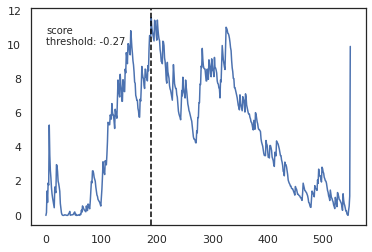

In [8]:
# Find maxstat
df_original = final_tcga_data
score = 'scNMF senecent epithelium'
measure = 'PFI.time'
event = 'PFI'

df = df_original.sort_values(score)
logrank_statistics = []

for idx in tqdm(np.arange(len(df))):
    low_score_group = df[:idx]
    high_score_group = df[idx:]
    result = logrank_test(high_score_group[measure], low_score_group[measure], event_observed_A=high_score_group[event], event_observed_B=low_score_group[event]).test_statistic
    logrank_statistics.append(result)

# Find the correct threshold with maxstat

lower_bound = 0.15*len(df)
upper_bound = 0.85*len(df)

x_highest = 0
max_idx = np.argsort(logrank_statistics)[::-1][x_highest]
while True:
    max_idx = np.argsort(logrank_statistics)[::-1][x_highest]
    if (max_idx <= lower_bound) |  (max_idx >= upper_bound):
        max_idx = np.argsort(logrank_statistics)[::-1][x_highest]
        x_highest +=1
    else:
        break

# Define the optimal score thershold
score_thr = df.iloc[max_idx][score]

plt.plot(logrank_statistics)
plt.axvline(x = max_idx,linestyle='--',color='black')
plt.text(x=0,y=10,s=f'score\nthreshold: {score_thr:.2f}')



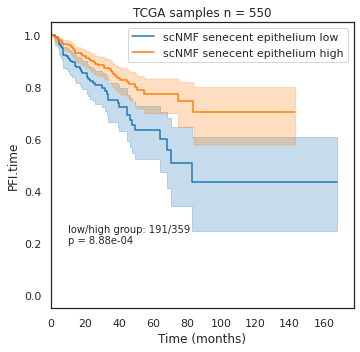

In [9]:

xmax = df_original['PFI.time'].max() + 10

# Split the dataframe into two groups based on the score
low_score_group = df_original[df_original[score] <= score_thr].copy()
high_score_group = df_original[df_original[score] > score_thr].copy()

# Plot the Kaplan-Meier curves for each group
fig, ax = plt.subplots(figsize=(5.2,5))

# Fit the survival data to the Kaplan-Meier estimator for each group
kmf1 = KaplanMeierFitter().fit(low_score_group[measure], event_observed=low_score_group[event], label=score + ' low')
kmf2 = KaplanMeierFitter().fit(high_score_group[measure], event_observed=high_score_group[event], label=score + ' high')
kmf1.plot(ax=ax, show_censors=False, ci_show=True,color='#1F77B4')
kmf2.plot(ax=ax, show_censors=False, ci_show=True, color='#FF7F0E')

ax.set_xlim(0,xmax)

# Add labels and title to the plot
plt.xlabel('Time (months)')
plt.ylabel(measure)

results = logrank_test(high_score_group[measure], low_score_group[measure], event_observed_A=high_score_group[event], event_observed_B=low_score_group[event])
pval = results.p_value

n_low = len(low_score_group)
n_high = len(high_score_group)
plt.text(x=10,y=0.2,s=f'low/high group: {n_low}/{n_high}\np = {pval:.2e}')
plt.title(f'TCGA samples n = {len(df)}')


# Add legend to the plot
plt.legend()

# Add 'at risk' counts table to the plot
#add_at_risk_counts(kmf1, kmf2)

ax.set_ylim(-0.05,1.05)
plt.tight_layout()

s = score.replace(' ','_')
plt.savefig(plot_save_path + f'TCGA_kaplan_meier_{s}_score.pdf')
plt.savefig(plot_save_path + f'TCGA_kaplan_meier_{s}_score.png')

plt.show()


## SU2C Metastatic Prostate Adenocarcinoma (SU2C/PCF Dream Team, PNAS 2019)

In [22]:
# Download both subsets
dat_polya = pd.read_csv('bulk_RNAseq/prad_su2c_2019/data_mrna_seq_fpkm_polya.txt',sep='\t',index_col=0)
su2c_clinical_data = pd.read_csv('bulk_RNAseq/prad_su2c_2019/data_clinical_patient.txt',sep='\t',skiprows=4)

# Drop those the entries that don't have survival status information
su2c_clinical_data = su2c_clinical_data[~(su2c_clinical_data['OS_STATUS'].isna())].reset_index(drop=True)

# Format OS into float for the Kaplan Meier plotting
su2c_clinical_data['OS'] = pd.Series([s[0] for s in su2c_clinical_data['OS_STATUS'].str.split(':')],dtype=float)

# Add the sample ID information to the clinical info dataframe
su2c_clinical_data_sample = pd.read_csv('bulk_RNAseq/prad_su2c_2019/data_clinical_sample.txt',sep='\t',skiprows=4)


# Map only the samples that meet this criteria
#su2c_clinical_data_sample = su2c_clinical_data_sample[su2c_clinical_data_sample['ABI_ENZA_EXPOSURE_STATUS'] == 'Naive'].reset_index() # Subset to those that are abi_enza treated
#su2c_clinical_data_sample = su2c_clinical_data_sample[su2c_clinical_data_sample['PATHOLOGY_CLASSIFICATION'] == 'Adenocarcinoma'].reset_index() # Subset to those that are adenocarcinoma

patient_sample_mapping_dict = su2c_clinical_data_sample[['PATIENT_ID','SAMPLE_ID']].set_index('PATIENT_ID').to_dict()['SAMPLE_ID']
su2c_clinical_data['SAMPLE_ID'] = su2c_clinical_data['PATIENT_ID'].map(patient_sample_mapping_dict)

su2c_clinical_data = su2c_clinical_data[~(su2c_clinical_data['SAMPLE_ID'].isna())]

su2c_clinical_data['OS_STATUS'].value_counts()

1:DECEASED    76
0:LIVING      52
Name: OS_STATUS, dtype: int64

### Run scoring

In [23]:
# Run enrichment of both the the polyA and the capture sets
polya_enrichment_res = gp.gsva(data=dat_polya,gene_sets=gene_modules_dict,outdir=None, min_size=0, max_size=3000)
polya_enrichment_df = polya_enrichment_res.res2d.pivot(index='Name', columns='Term', values='ES').reset_index(names='Sample Identifier')

# Merge enrichment results with the metadata
polya_enrichment_res = pd.merge(su2c_clinical_data,polya_enrichment_df,left_on='SAMPLE_ID',right_on='Sample Identifier')

2024-11-12 13:07:58,717 [WARNING] Found duplicated gene names, values averaged by gene names!


### Find the maxstat and plot KM

100%|██████████| 76/76 [00:02<00:00, 38.00it/s]


Text(0, 2, 'score\nthreshold: 0.34')

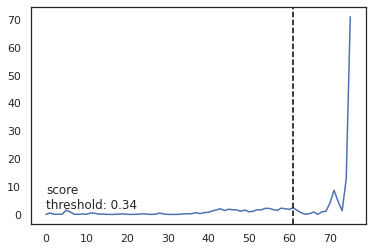

In [24]:
# Find maxstat
df_original = polya_enrichment_res
score = 'Prostate IL1A_IL1B'
measure = 'OS_MONTHS'
event = 'OS'

df = df_original.sort_values(score)
logrank_statistics = []

for idx in tqdm(np.arange(len(df))):
    low_score_group = df[:idx]
    high_score_group = df[idx:]
    result = logrank_test(high_score_group[measure], low_score_group[measure], event_observed_A=high_score_group[event], event_observed_B=low_score_group[event]).test_statistic
    logrank_statistics.append(result)


# Find the correct threshold with maxstat

lower_bound = 0.15*len(df)
upper_bound = 0.85*len(df)

x_highest = 0
max_idx = np.argsort(logrank_statistics)[::-1][x_highest]
while True:
    max_idx = np.argsort(logrank_statistics)[::-1][x_highest]
    if (max_idx <= lower_bound) |  (max_idx >= upper_bound):
        max_idx = np.argsort(logrank_statistics)[::-1][x_highest]
        x_highest +=1
    else:
        break

# Define the optimal score thershold
score_thr = df.iloc[max_idx][score]

plt.plot(logrank_statistics)
plt.axvline(x = max_idx,linestyle='--',color='black')
plt.text(x=0,y=2,s=f'score\nthreshold: {score_thr:.2f}')



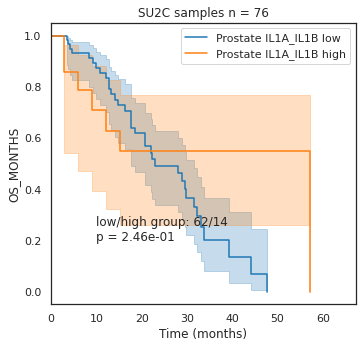

In [25]:
sns.set_theme(style='white')
xmax = df_original[measure].max() + 10

# Split the dataframe into two groups based on the score
low_score_group = df_original[df_original[score] <= score_thr].copy()
high_score_group = df_original[df_original[score] > score_thr].copy()

# Plot the Kaplan-Meier curves for each group
fig, ax = plt.subplots(figsize=(5.2,5))

# Fit the survival data to the Kaplan-Meier estimator for each group
kmf1 = KaplanMeierFitter().fit(low_score_group[measure], event_observed=low_score_group[event], label=score + ' low')
kmf2 = KaplanMeierFitter().fit(high_score_group[measure], event_observed=high_score_group[event], label=score + ' high')
kmf1.plot(ax=ax, show_censors=False, ci_show=True,color='#1F77B4')
kmf2.plot(ax=ax, show_censors=False, ci_show=True, color='#FF7F0E')

ax.set_xlim(0,xmax)

# Add labels and title to the plot
plt.xlabel('Time (months)')
plt.ylabel(measure)

results = logrank_test(high_score_group[measure], low_score_group[measure], event_observed_A=high_score_group[event], event_observed_B=low_score_group[event])
pval = results.p_value

n_low = len(low_score_group)
n_high = len(high_score_group)
plt.text(x=10,y=0.2,s=f'low/high group: {n_low}/{n_high}\np = {pval:.2e}')
plt.title(f'SU2C samples n = {len(df)}')


# Add legend to the plot
plt.legend()

# Add 'at risk' counts table to the plot
#add_at_risk_counts(kmf1, kmf2)

ax.set_ylim(-0.05,1.05)
plt.tight_layout()

s = score.replace(' ','_')
plt.savefig(plot_save_path + f'SU2C_kaplan_meier_{s}_score.pdf')
plt.savefig(plot_save_path + f'SU2C_kaplan_meier_{s}_score.png')

plt.show()
